In [2]:
import numpy as np
from astropy.io import fits
import datetime 
import matplotlib.pyplot as plt
# from matplotlib import cm
from validation import *
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from skimage.transform import resize

C:\Users\delbe\OneDrive\Desktop\eCallistoValidation\validation\sources\../..\radiospectra2\radiospectra\version.py:12: UserWarning: could not determine radiospectra package version; this indicates a broken installation
  warnings.warn(


In [16]:
class OrfeesSpectrogram:
    
    def __init__(self, file=None):
        data = {}
        
        if file:
            data = self.read_orfees(file)
               
        self.__init_values__(**data)
            
    def __init_values__(self, **kwargs):
        self.data = kwargs.get("data", None)
        self.time_axis = kwargs.get("time_axis", None)
        self.freq_axis = kwargs.get("freq_axis", None)
        self.date_obs = kwargs.get("date_obs", None)
        self.time_start_obs = kwargs.get("time_start_obs", None)
        self.time_end_obs = kwargs.get("time_end_obs", None)


    def read_orfees(self, filename):
        hdulist=fits.open(filename)

        h_file = hdulist[0].header
        frequency = hdulist[1].data
        h_data = hdulist[2].data ####


        date_obs = h_file[4]
        time_start_obs = h_file[5]
        time_end_obs = h_file[7]

        data_SI_B1 = h_data.STOKESI_B1
        data_SI_B2 = h_data.STOKESI_B2
        data_SI_B3 = h_data.STOKESI_B3
        data_SI_B4 = h_data.STOKESI_B4
        data_SI_B5 = h_data.STOKESI_B5

        time_axis = h_data.TIME_B1

        freq_b1=frequency.FREQ_B1[0]
        freq_b2=frequency.FREQ_B2[0]
        freq_b3=frequency.FREQ_B3[0]
        freq_b4=frequency.FREQ_B4[0]
        freq_b5=frequency.FREQ_B5[0]

        freq_axis = np.concatenate([freq_b1,freq_b2,freq_b3,freq_b4,freq_b5])

        data = np.concatenate([data_SI_B1,data_SI_B2,data_SI_B3,data_SI_B4,data_SI_B5],axis=1)

        return {
            "data": data,
            "time_axis": time_axis,
            "freq_axis": freq_axis,
            "date_obs": date_obs,
            "time_start_obs": time_start_obs,
            "time_end_obs": time_end_obs
        }


    def peek(self, size=(7,5), dtFmt='%Y-%m-%d %H:%M:%S:%f'):
        
        date_start = self.date_obs + " "+ self.time_start_obs 
        
        vmax, vmin, vmean = self.data.max(), self.data.min(), self.data.mean()
        
        fig, ax = plt.subplots(figsize=size, dpi = 80)
        xa = ax.get_xaxis()
        ax.tick_params(axis='x', labelrotation = 50)
        
        xa.set_major_formatter(FuncFormatter(
                lambda x, pos: (
                    datetime.datetime.strptime(date_start, dtFmt) + datetime.timedelta(seconds=x)).replace(microsecond=0)
                )
            )
    
        im = plt.imshow(np.array(self.data), vmin=vmin, vmax=300)
    
        fig.colorbar(im, label="Intensity")
        y = self.freq_axis
        ax.set_ylim(min(y), max(y))
        
        plt.xlabel('Time[UT]')
        plt.ylabel('Frequency [MHz]')
        
        plt.show()

7.1885247
2045.196
144.13
1004.7


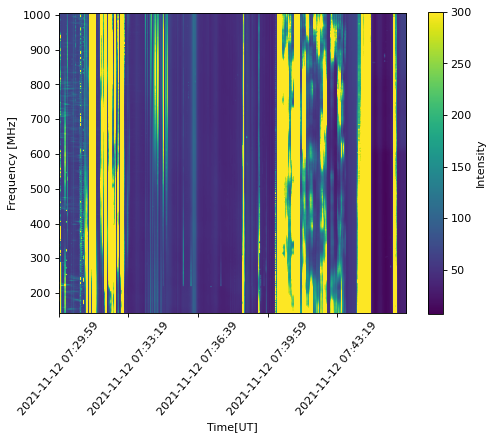

In [19]:
spec_orfees = OrfeesSpectrogram("../ORFEES/int_orf20211112_073000_10.fts")

print(spec_orfees.data.min())
print(spec_orfees.data.mean())
print(spec_orfees.freq_axis.min())
print(spec_orfees.freq_axis.max())
spec_orfees.peek()

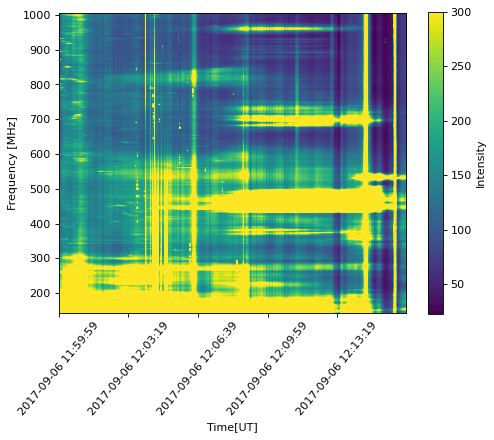

In [20]:
spec_orfees_3 = OrfeesSpectrogram("../ORFEES/int_orf20170906_120000_10.fts")
spec_orfees_3.peek()

int_orf20150702_152500_10.fts


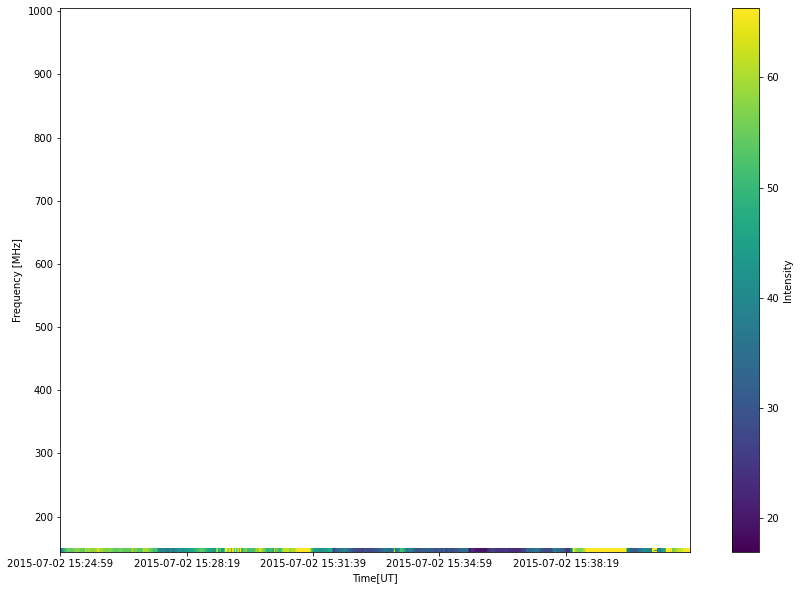

int_orf20151104_120000_0.1.fts


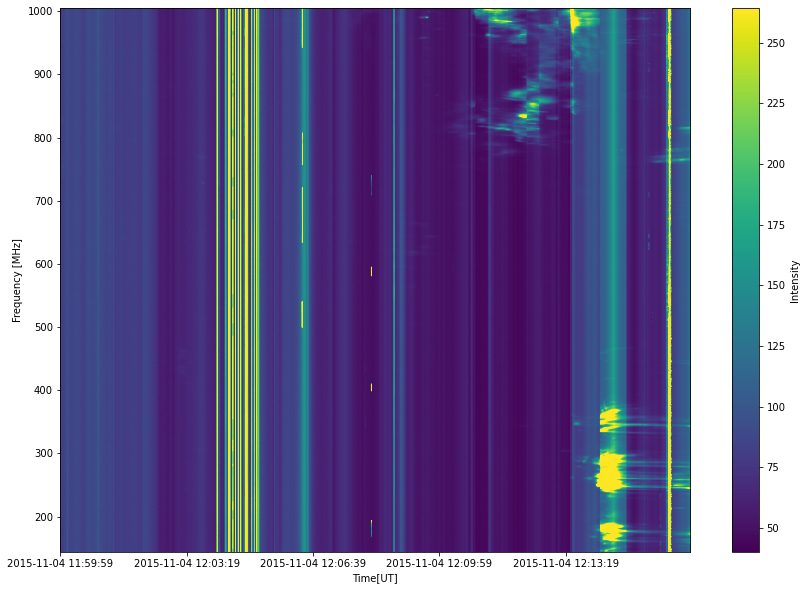

int_orf20151104_120000_10.fts


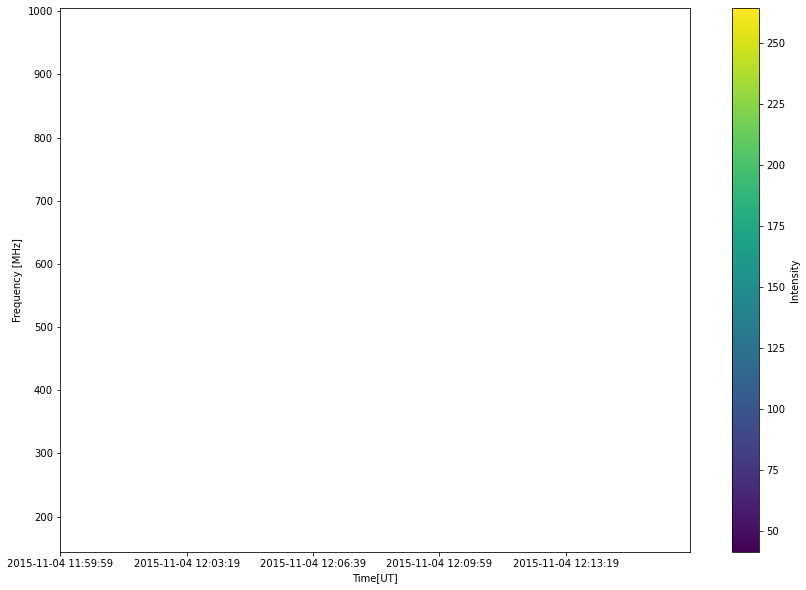

int_orf20170906_115500_10.fts


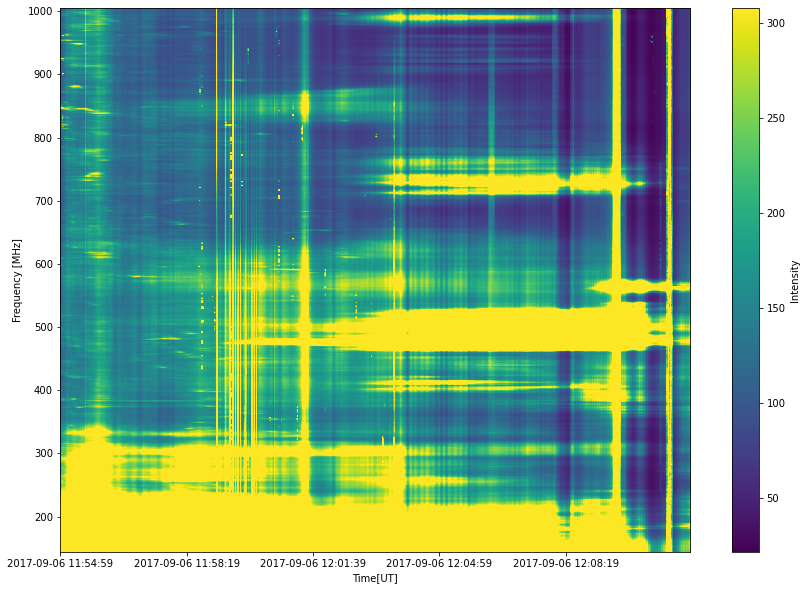

int_orf20170906_120000_10.fts


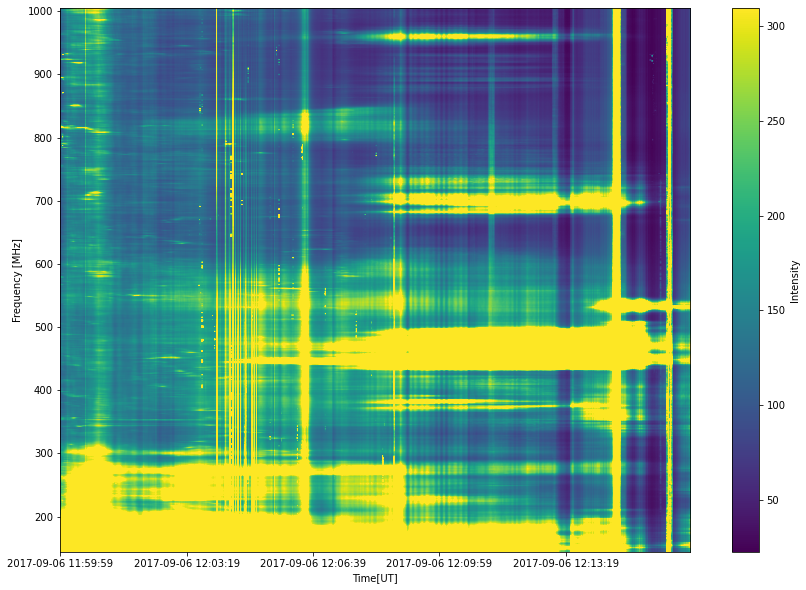

int_orf20170907_100000_10.fts


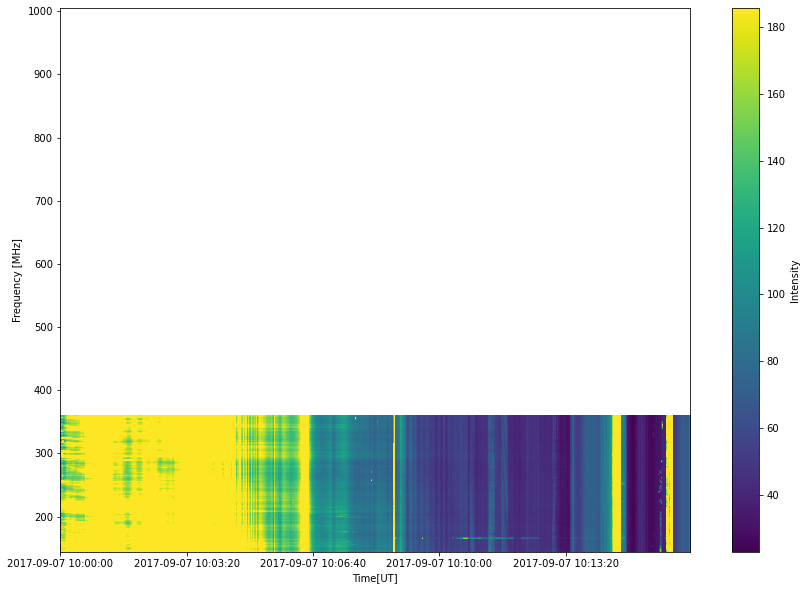

int_orf20170907_114500_10.fts


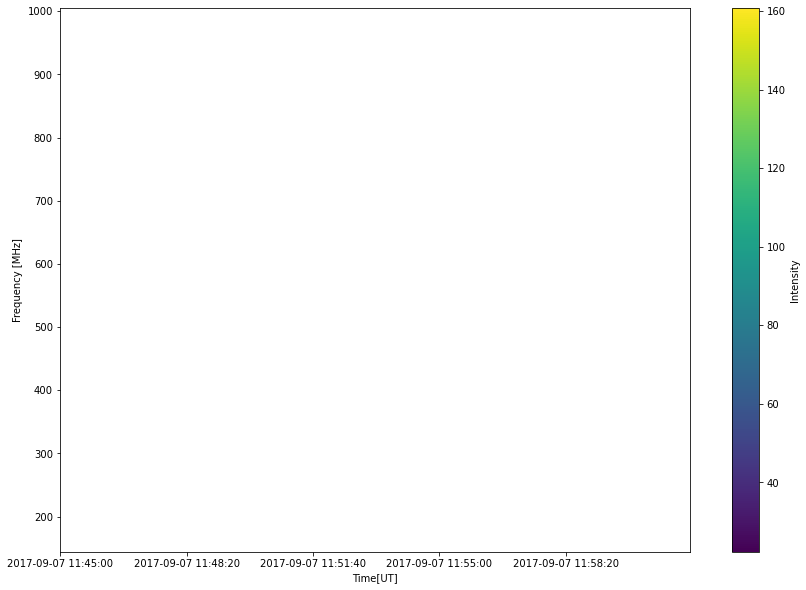

int_orf20170907_120000_10.fts


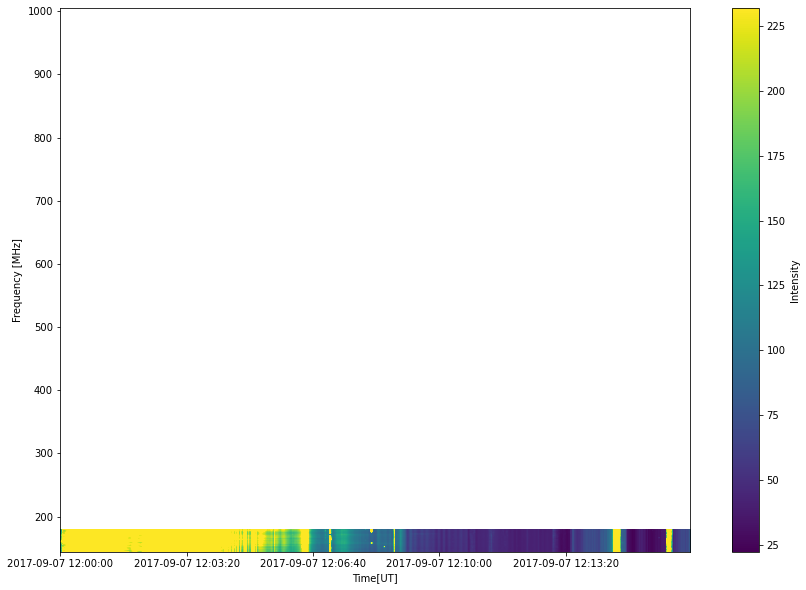

int_orf20170907_143000_10.fts


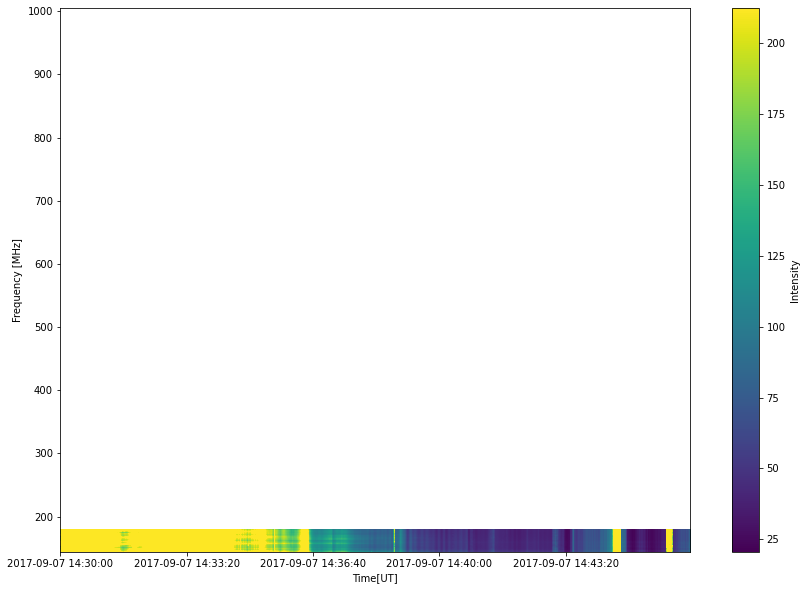

int_orf20170910_154800_10.fts


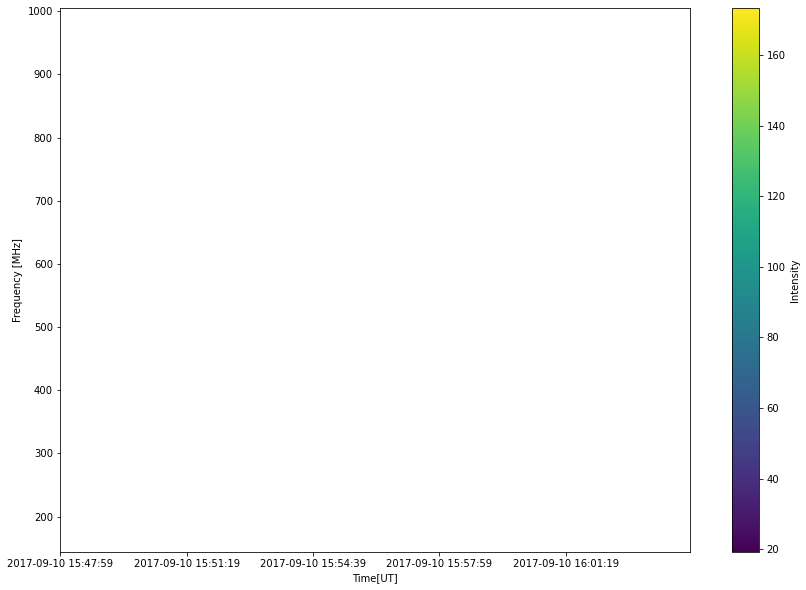

int_orf20170912_153000_10.fts


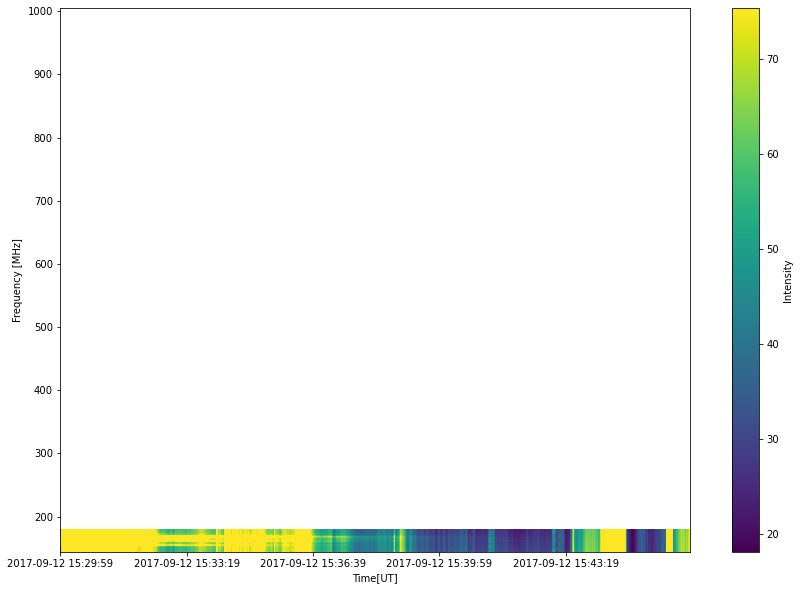

int_orf20170913_151500_10.fts


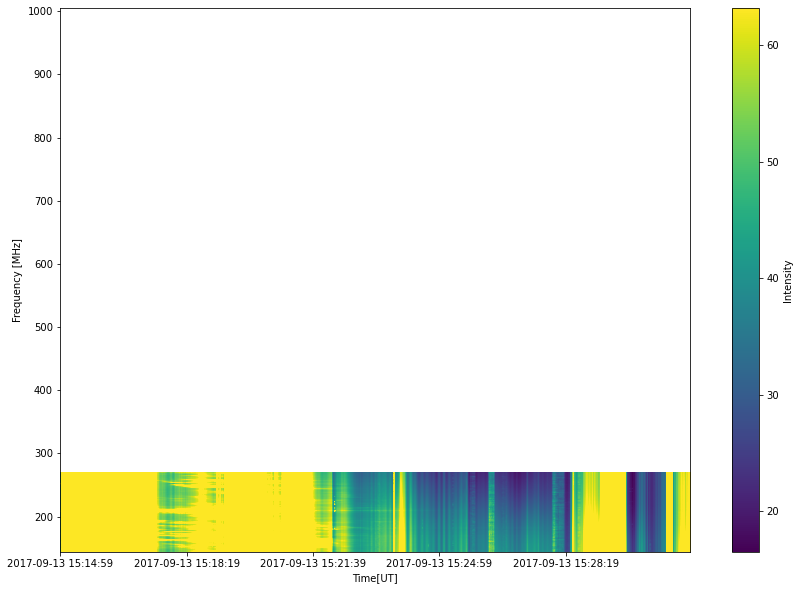

int_orf20210119_090800_10.fts


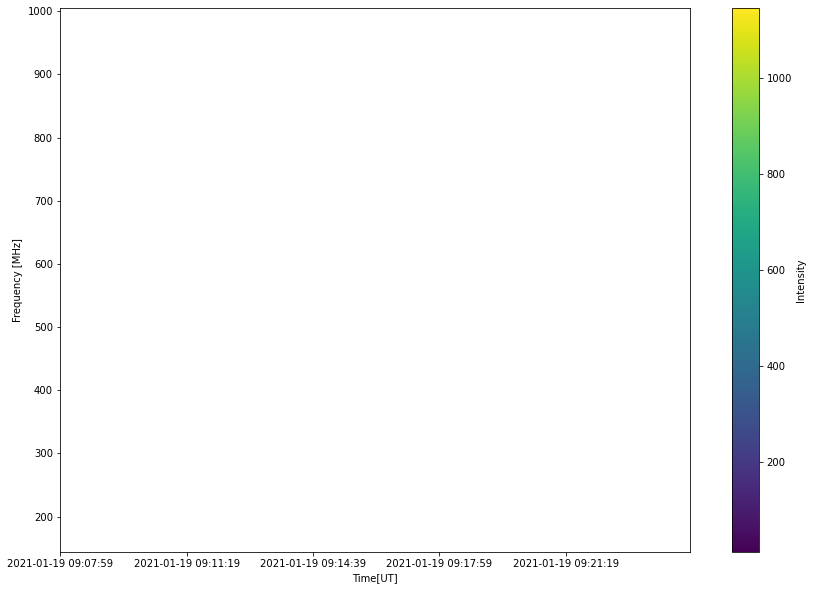

int_orf20210907_060000_10.fts


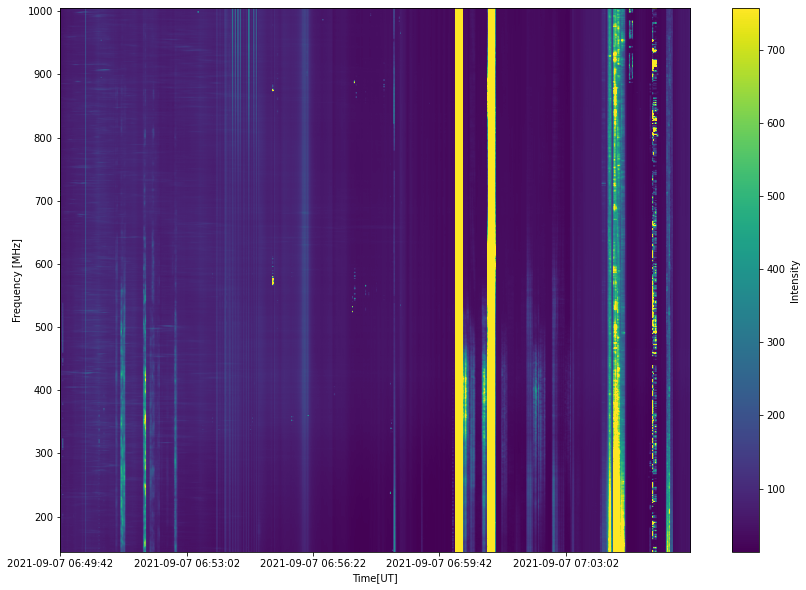

int_orf20210907_120000_10.fts


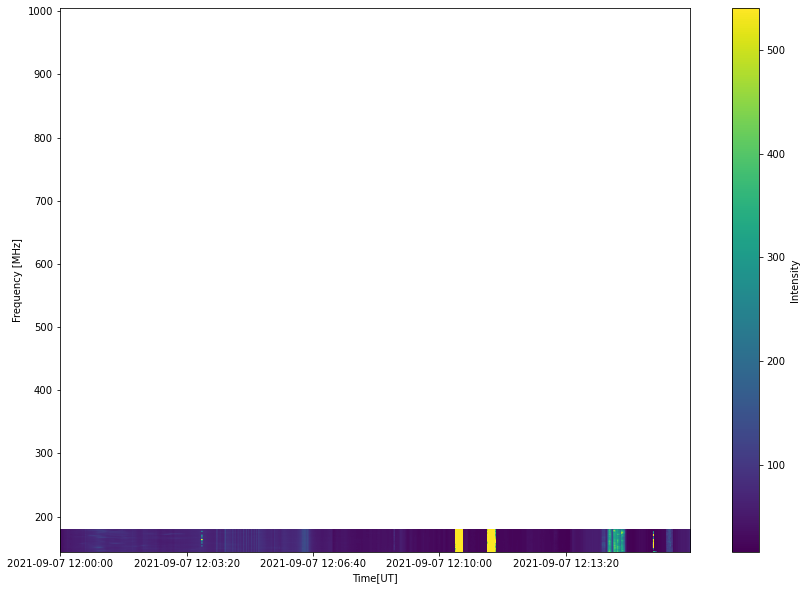

int_orf20210910_113000_10.fts


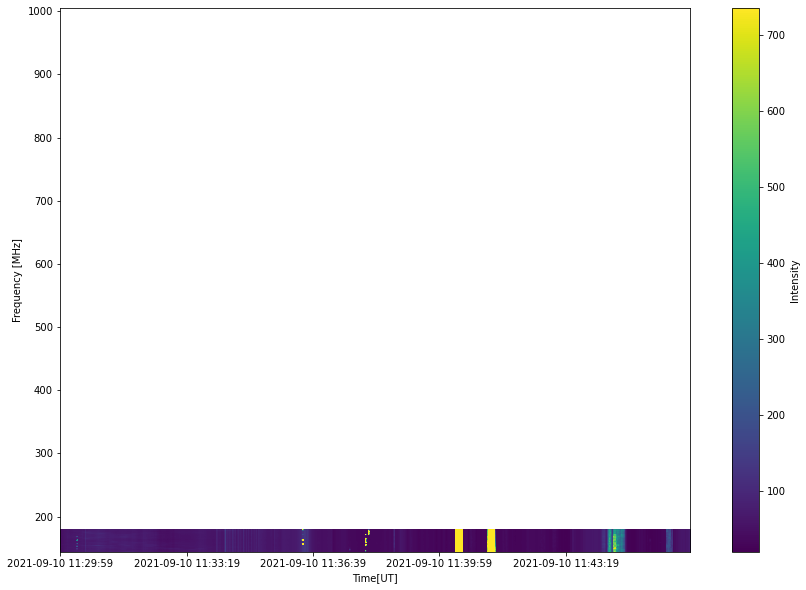

int_orf20210925_111500_10.fts


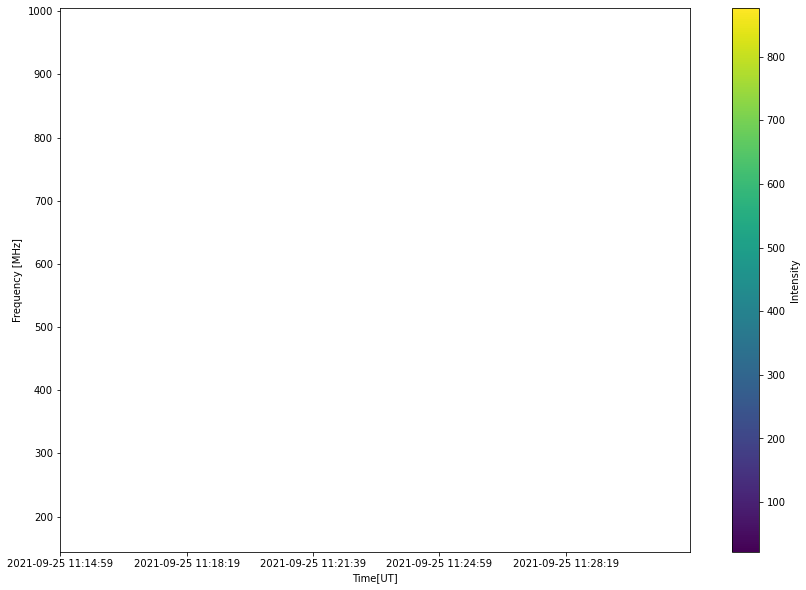

int_orf20210925_131500_10.fts


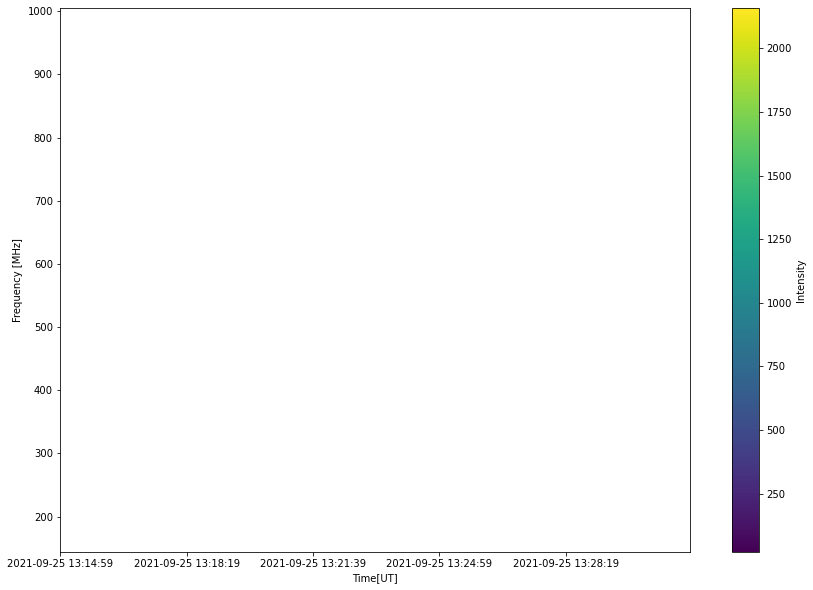

int_orf20210927_114000_10.fts


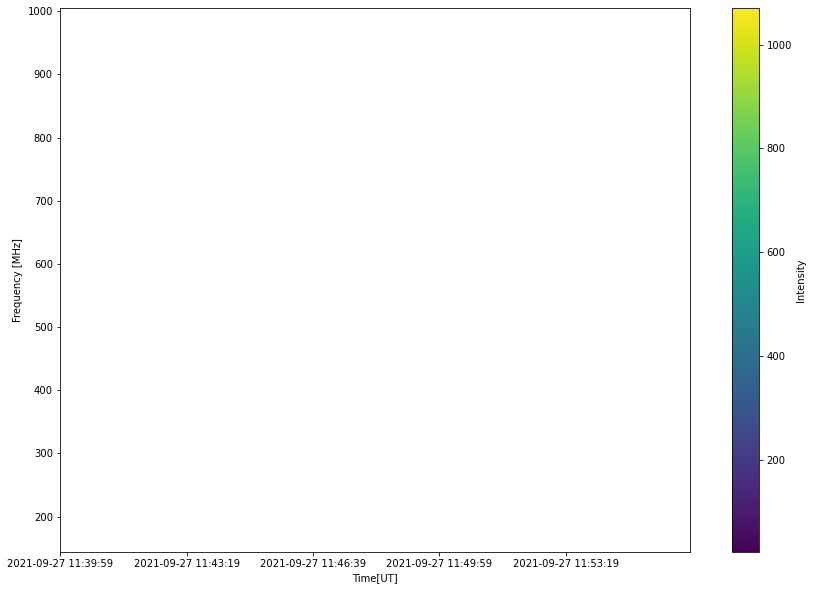

int_orf20210927_114100_10.fts


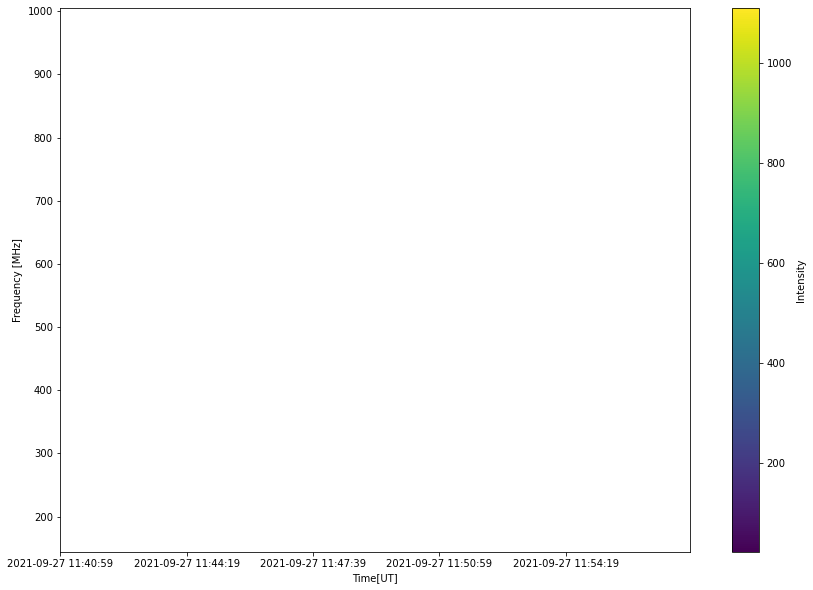

int_orf20210930_082800_10.fts


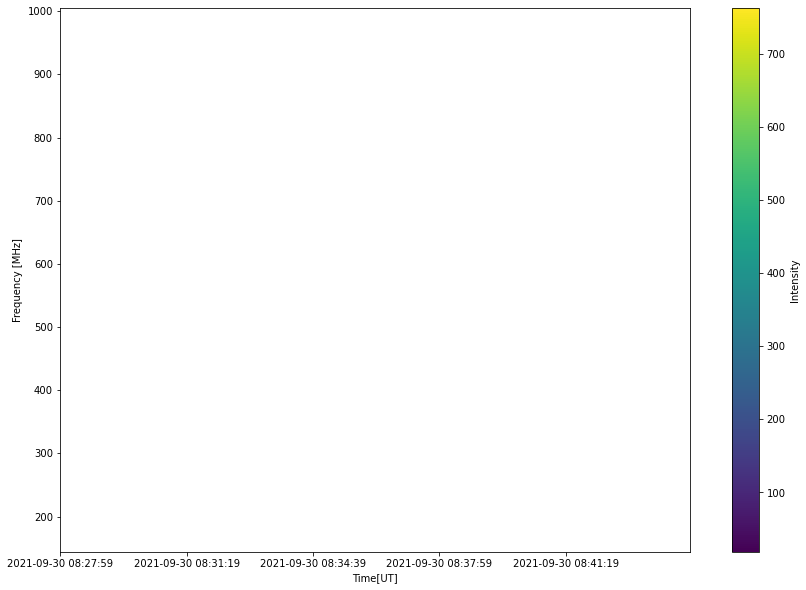

int_orf20211003_102400_10.fts


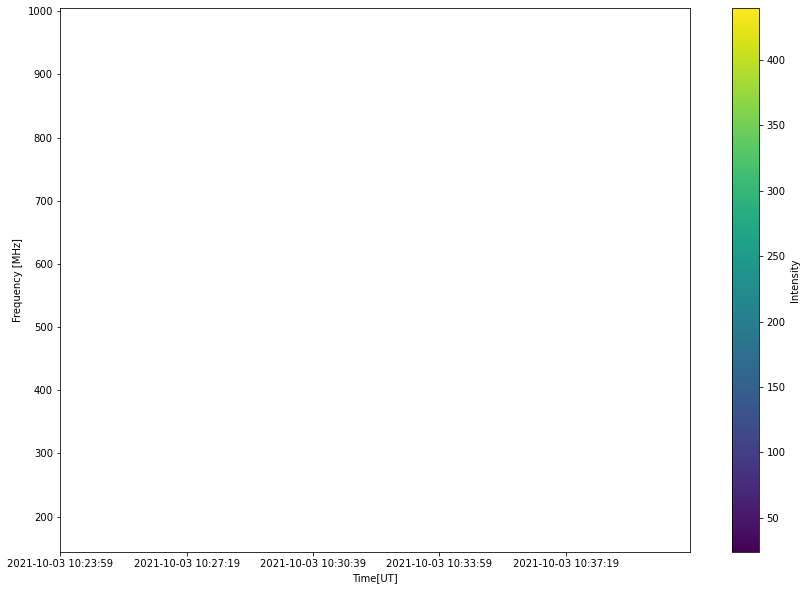

int_orf20211003_143500_10.fts


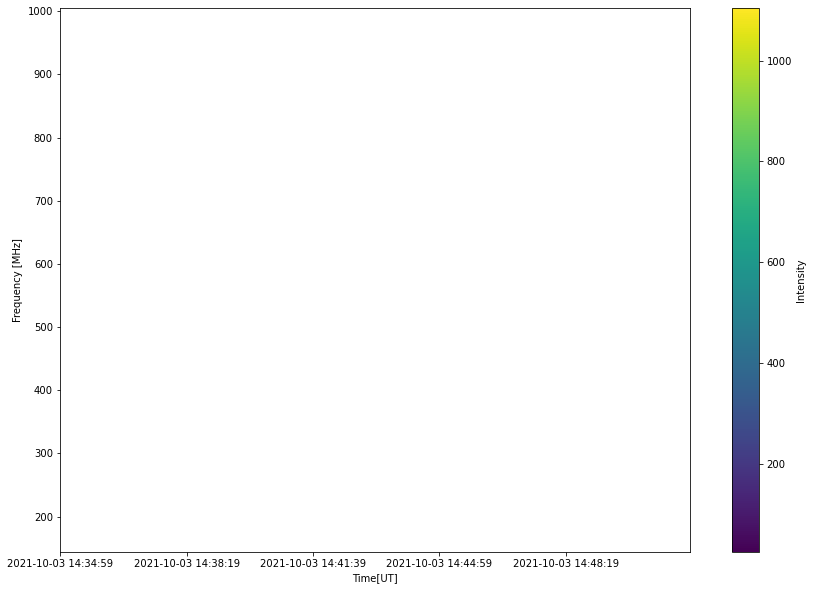

int_orf20211026_140000_10.fts


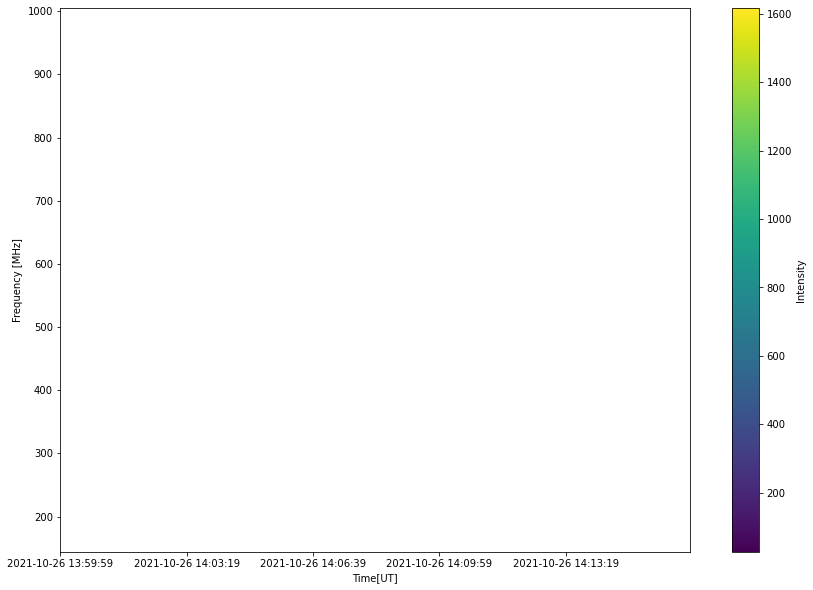

int_orf20211026_143900_10.fts


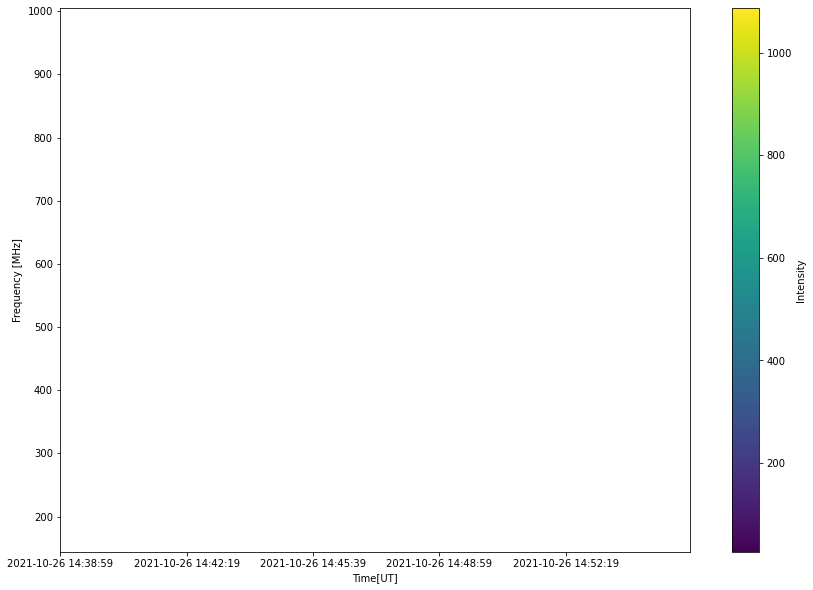

int_orf20211028_152500_10.fts


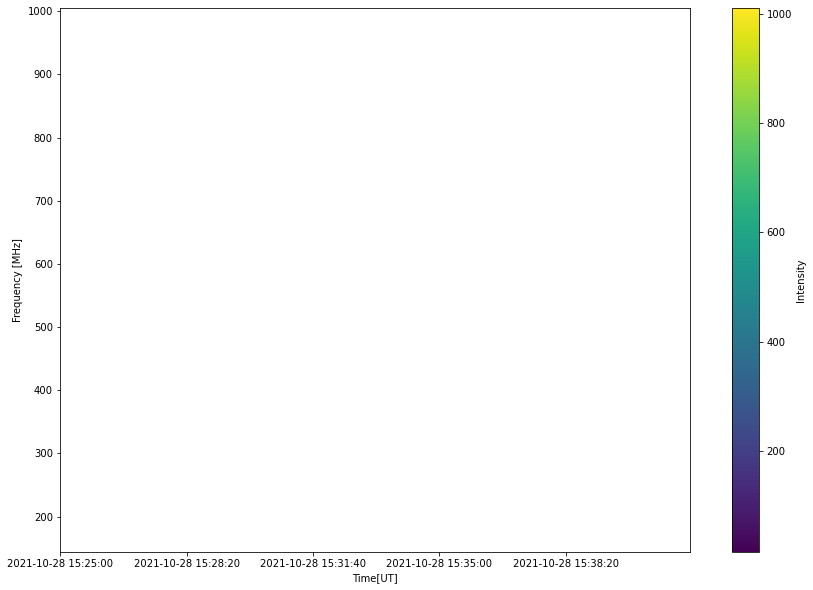

int_orf20211108_130000_10.fts


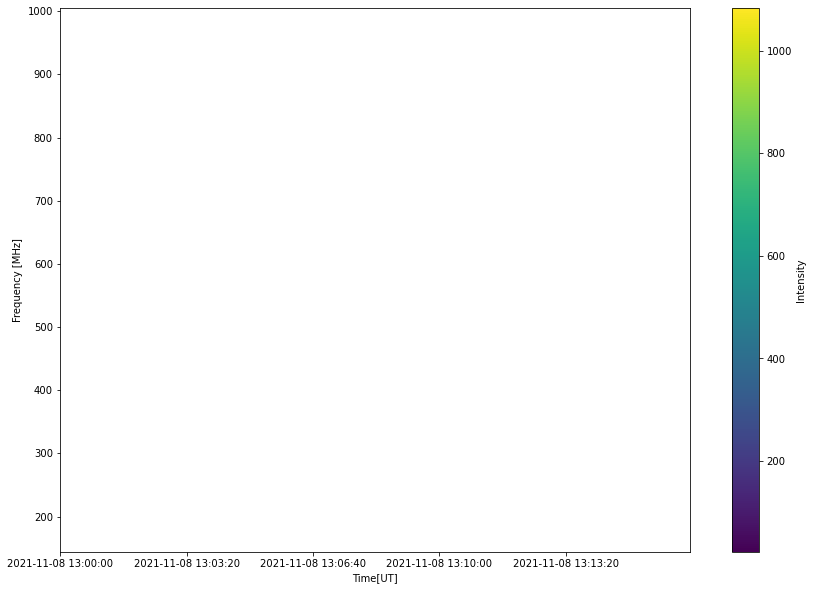

int_orf20211111_113000_10.fts


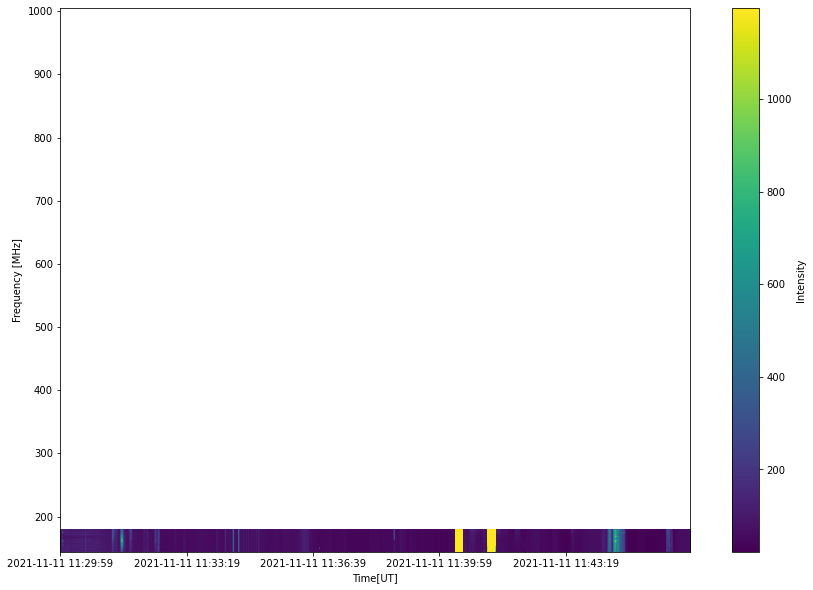

int_orf20211112_073000_10.fts


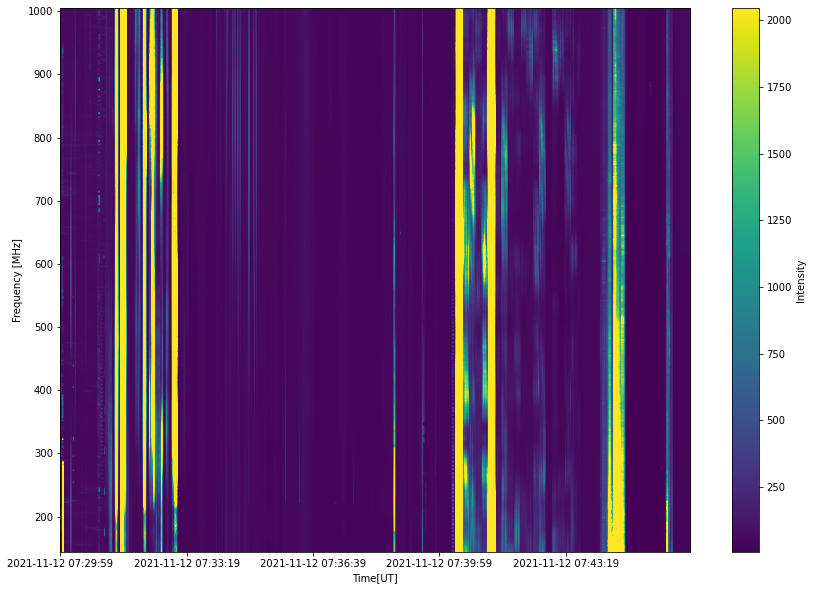

int_orf20211112_133000_10.fts


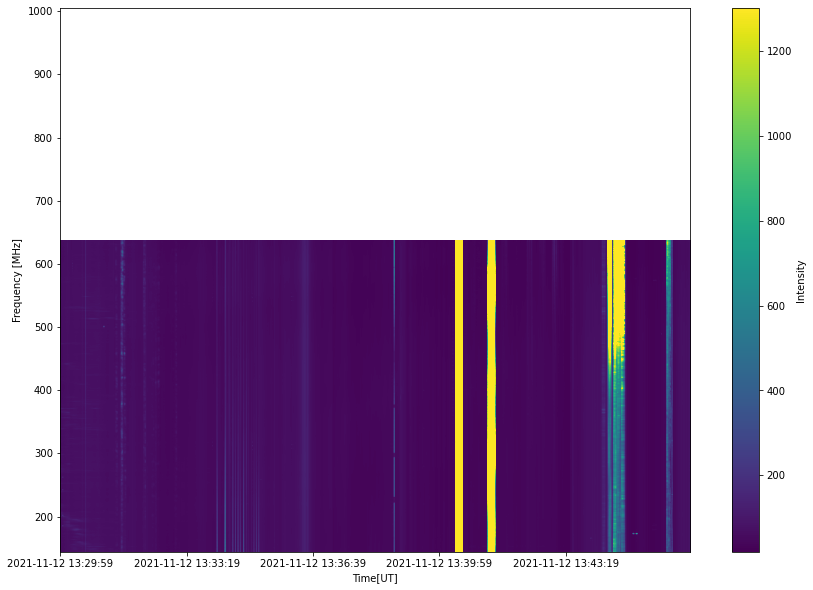

int_orf20220211_090000_10.fts


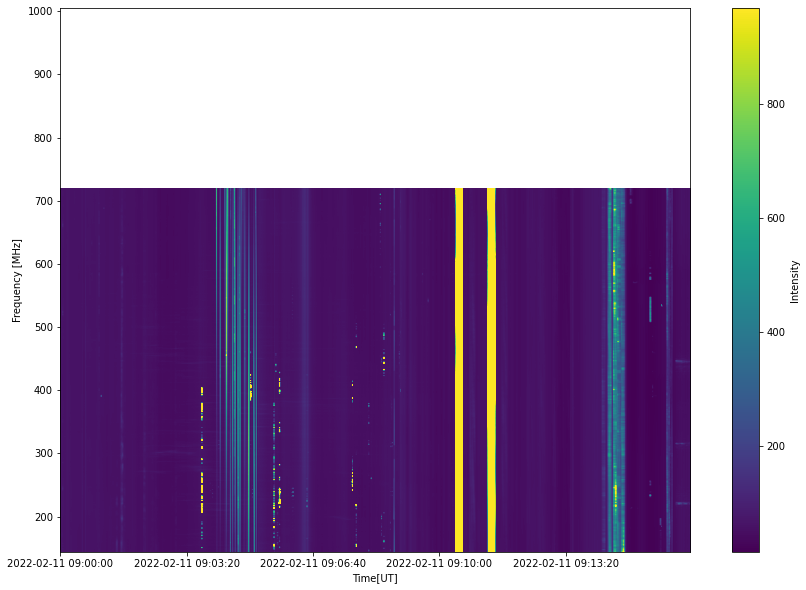

int_orf20220212_083000_10.fts


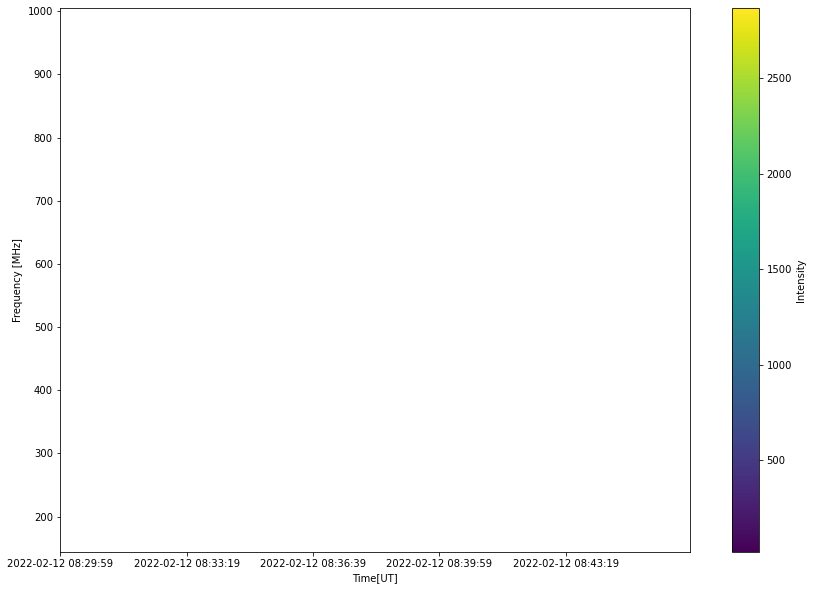

In [5]:
for root, dirs, files in os.walk(".."):
        for file in files:
            if file.endswith('.fts'):
                full_path = os.path.join(root, file)
                spec_orfees = OrfeesSpectrogram(full_path)
                print(file)
                spec_orfees.peek()

2 channels eliminated
Eliminating sharp jumps between channels ...
18 channels eliminated


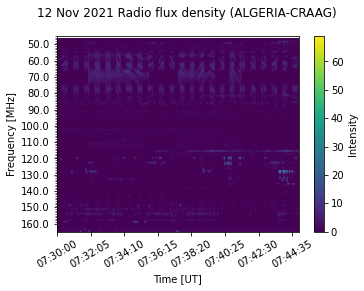

6 channels eliminated
Eliminating sharp jumps between channels ...
17 channels eliminated


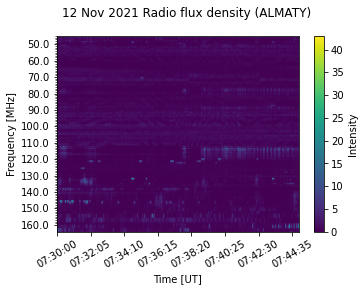

14 channels eliminated
Eliminating sharp jumps between channels ...
18 channels eliminated


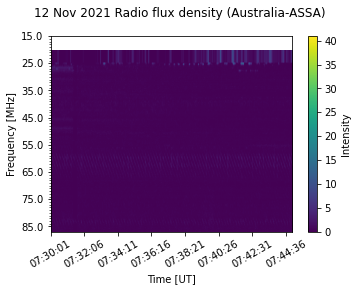

4 channels eliminated
Eliminating sharp jumps between channels ...
16 channels eliminated


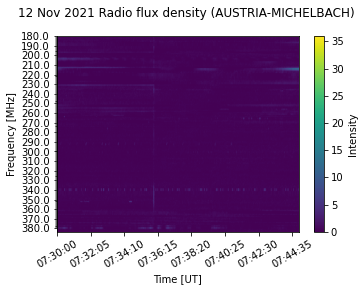

8 channels eliminated
Eliminating sharp jumps between channels ...
19 channels eliminated


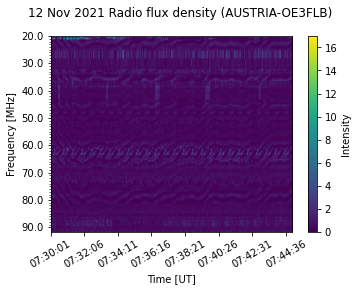

1 channels eliminated
Eliminating sharp jumps between channels ...
21 channels eliminated


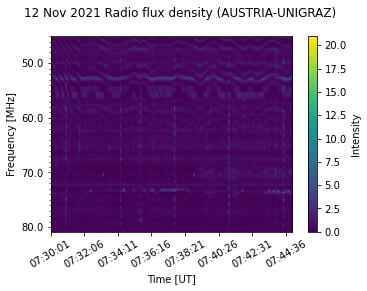

14 channels eliminated
Eliminating sharp jumps between channels ...
16 channels eliminated


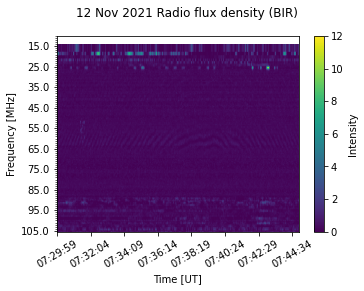

0 channels eliminated
Eliminating sharp jumps between channels ...
24 channels eliminated


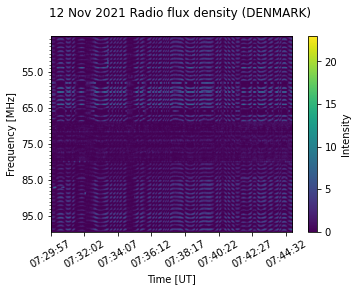

5 channels eliminated
Eliminating sharp jumps between channels ...
23 channels eliminated


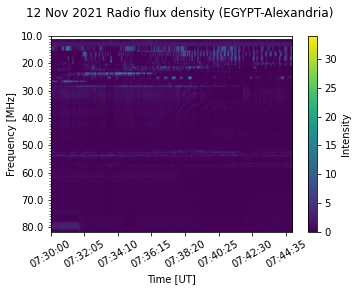

20 channels eliminated
Eliminating sharp jumps between channels ...
11 channels eliminated


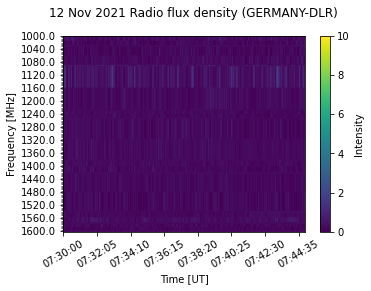

7 channels eliminated
Eliminating sharp jumps between channels ...
18 channels eliminated


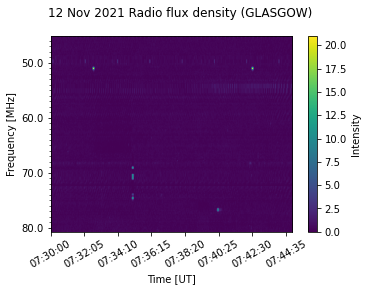

0 channels eliminated
Eliminating sharp jumps between channels ...
17 channels eliminated


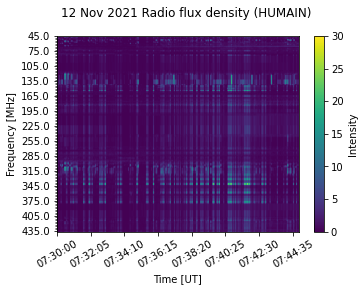

0 channels eliminated
Eliminating sharp jumps between channels ...
20 channels eliminated


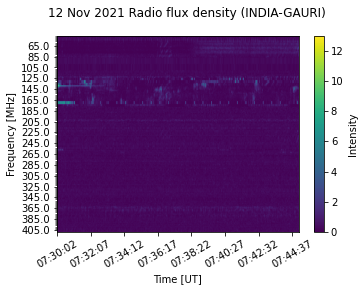

9 channels eliminated
Eliminating sharp jumps between channels ...
24 channels eliminated


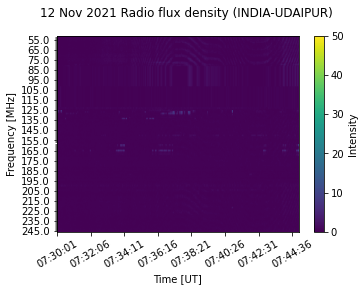

0 channels eliminated
Eliminating sharp jumps between channels ...
21 channels eliminated


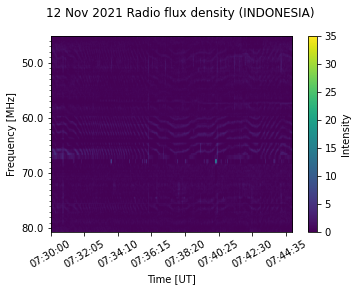

0 channels eliminated
Eliminating sharp jumps between channels ...
13 channels eliminated


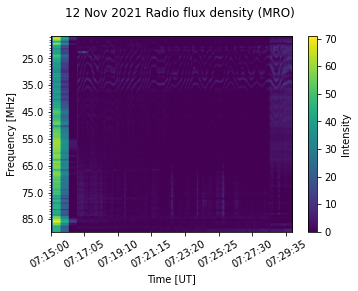

1 channels eliminated
Eliminating sharp jumps between channels ...
22 channels eliminated


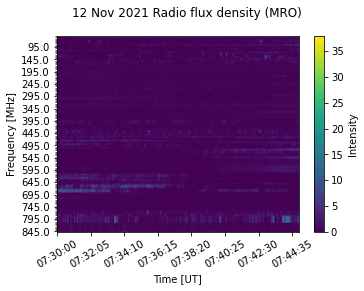

0 channels eliminated
Eliminating sharp jumps between channels ...
17 channels eliminated


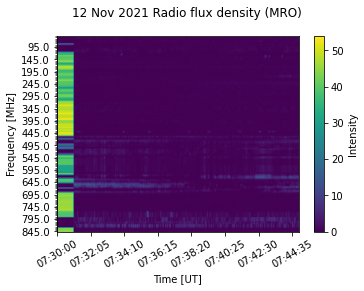

In [10]:
for root, dirs, files in os.walk("../test_eca"):
        for file in files:
            if file.endswith('.fit.gz'):
                full_path = os.path.join(root, file)
                spec = CallistoSpectrogram.read(full_path)
#                 spec.data[spec.data < 0 ] = 0 
                spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
                spec2.data[spec2.data < 0 ] = 0 
                # spec2_abs = spec2.data.copy()
                #spec2_abs[spec2_abs < 0 ] = 0 
                # plt.figure(figsize= (15, 10))
                # plt.imshow(spec2_abs)
                spec2.plot()
                plt.show()

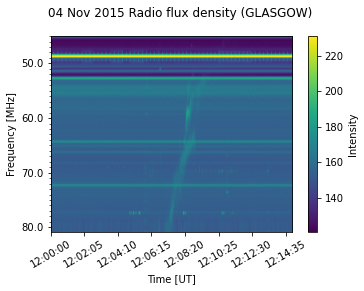

In [45]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/GLASGOW_20151104_120000_59.fit.gz')
spec.peek()
plt.show()

0 channels eliminated
Eliminating sharp jumps between channels ...
19 channels eliminated
-17.569060773480665
40.16022099447515


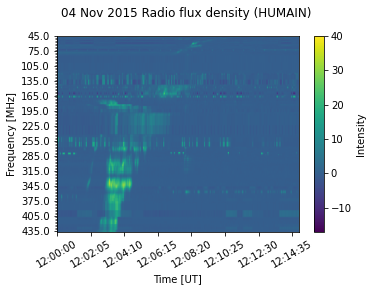

In [22]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/HUMAIN_20151104_120000_59.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
print(spec2.data.min())
print(spec2.data.max())
spec2.peek()
plt.show()

40.1875
1131451.5
144.13
1004.7


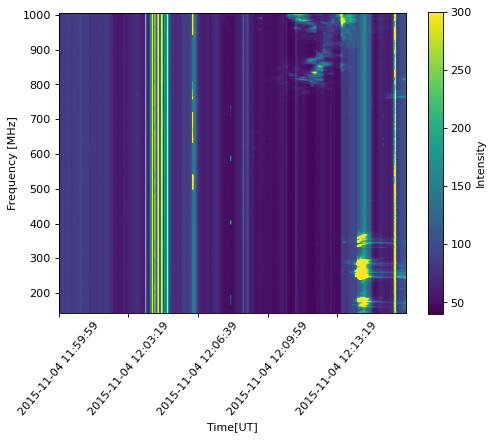

In [18]:
spec_orfees_3 = OrfeesSpectrogram("../ORFEES/int_orf20151104_120000_0.1.fts")

print(spec_orfees_3.data.min())
print(spec_orfees_3.data.max())
print(spec_orfees_3.freq_axis.min())
print(spec_orfees_3.freq_axis.max())

spec_orfees_3.peek()

In [ ]:
# def plot_orfees(self, **kwargs):

#         figure = plt.gcf()
#         axes = figure.add_subplot(111)
#         axes.plot(self.time, self.freq, **kwargs)
#         xa = axes.get_xaxis()
        
#         axes.set_xlabel("Time [UT]")
#         axes.set_ylabel("Frequency [MHz]")

#         return figure

# plt.plot(time_axis,freq_axis)
# plt.show()


# time_ax = spec_orfees[1]
# date_obs = spec_orfees[3]
# time_start_obs = spec_orfees[4]
# t_delta = time_axis(time_ax)

# date_start = date_obs + " "+ time_start_obs
# # print(date_start)

# time_fmt='%Y-%m-%d %H:%M:%S:%f'

# def create_time_axis(array):
#     x_delta = datetime.datetime.strptime(date_start, time_fmt) + datetime.timedelta(seconds=x)
#     return x_delta.replace(microsecond=0)

# for x in t_delta:
#     print(create_time_axis(x))


# def create_time_axis(array):
#     x_delta = datetime.datetime.strptime(date_start, time_fmt) + datetime.timedelta(seconds=x)
#     return x_delta.replace(microsecond=0)


# def time_axis(*time_array):
#     size = 0
    
#     for array in time_array:
#         size += len(array)
    
#     return np.arange(0, size*10, 10.0)